In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=30fa2041b66c014d44825e5a026782eb12b112be9159b73e504b4e7865d894d9
  Stored in directory: /root/.cache/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


In [ ]:
pip install transformers torch

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [ ]:
# General-purpose libraries
import pandas as pd
import numpy as np
import re
import gc
from collections import Counter
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Natural Language Toolkit (NLTK)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model training and evaluation
from sklearn.model_selection import (
    train_test_split, RandomizedSearchCV, StratifiedKFold
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, make_scorer
)
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# Handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Word Embeddings
from gensim.models import Word2Vec

# Statistical distributions
from scipy.stats import uniform

# PyTorch and Transformers
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW

from transformers import (
    BertTokenizerFast, BertForSequenceClassification,
    RobertaTokenizerFast, RobertaForSequenceClassification,
    DistilBertTokenizerFast, DistilBertForSequenceClassification
)

# Torchinfo for model summaries
from torchinfo import summary

# TensorFlow
import tensorflow as tf


# **Preprocessing**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/smc/Reviews.csv", nrows=5000)  #limit to 5000 rows to save resources, enhance model time

<ipython-input-4-297035877>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Score', palette='viridis')


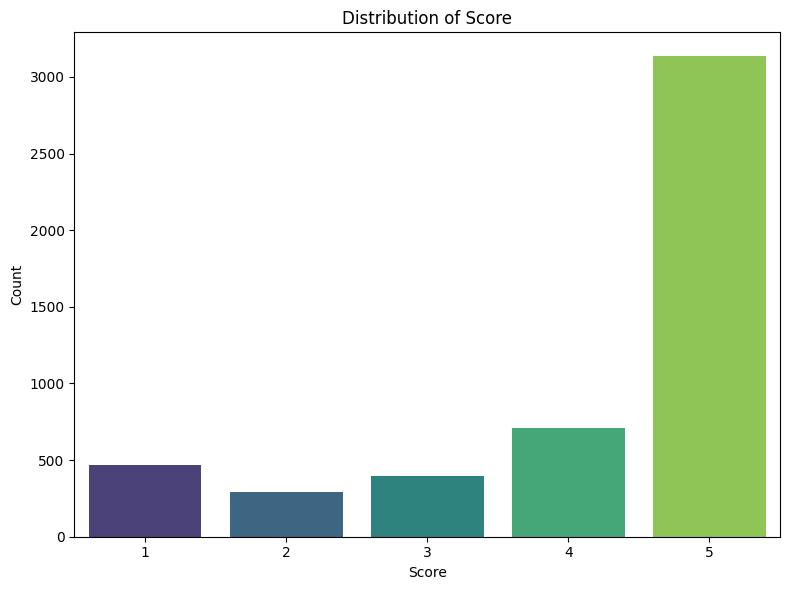

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Score', palette='viridis')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Sentiment
positive    3846
negative     759
neutral      395
Name: count, dtype: int64


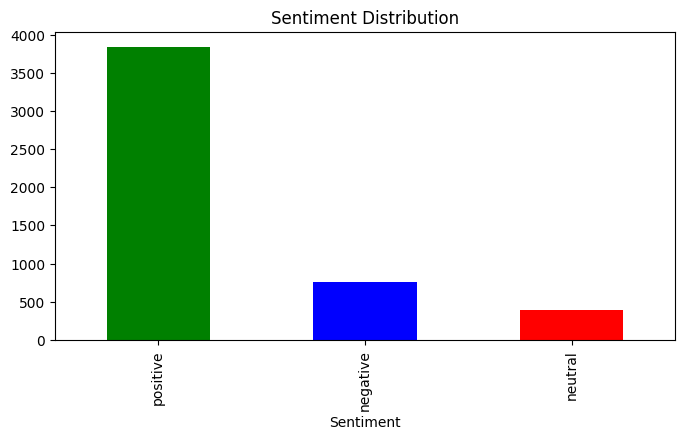

In [ ]:
# Map scores to sentiment
df['Sentiment'] = df['Score'].apply(
    lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative')
)

# Verify distribution
print(df['Sentiment'].value_counts())

# Plot sentiment distribution
plt.figure(figsize=(8, 4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
print(df.isna().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Sentiment                 0
dtype: int64


In [ ]:
df = df.dropna(subset=['Text'])  # Drop rows with missing review text
df= df.dropna(subset=['Summary'])
df = df.drop_duplicates(subset=['UserId', 'Text'])  # Drop duplicates
df['full_review'] = df['Summary'] + ' ' + df['Text']

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,full_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,Good Quality Dog Food I have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,Not as Advertised Product arrived labeled as J...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"""Delight"" says it all This is a confection tha..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,Cough Medicine If you are looking for the secr...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,Great taffy Great taffy at a great price. The...


In [ ]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)

    # 1. Lowercase
    text = text.lower()

    # 2. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 3. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 4. Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 5. Tokenization
    tokens = word_tokenize(text)

    # 6. Stop word removal
    tokens = [word for word in tokens if word not in stop_words]

    # 7. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

df['full_review'] = df['full_review'].apply(preprocess_text)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,full_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,good quality dog food bought several vitality ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,advertised product arrived labeled jumbo salte...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,delight say confection around century light pi...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,cough medicine looking secret ingredient robit...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,great taffy great taffy great price wide assor...


In [ ]:
df = df[['full_review', 'Sentiment']]

In [ ]:
df

,full_review,Sentiment
0,good quality dog food bought several vitality ...,positive
1,advertised product arrived labeled jumbo salte...,negative
2,delight say confection around century light pi...,positive
3,cough medicine looking secret ingredient robit...,negative
4,great taffy great taffy great price wide assor...,positive
...,...,...
4979,caveman must wealthy really wanted like thesef...,negative
4980,cooky need work make home impressed cooky trie...,negative
4981,okay pinch great cooky came sealed seem high q...,neutral
4982,good except rainforest flavor taste good arent...,positive


In [ ]:
# Save to CSV
df.to_csv("/content/drive/MyDrive/smc/amazon_cleaned.csv", index=False)

## Data Exploration

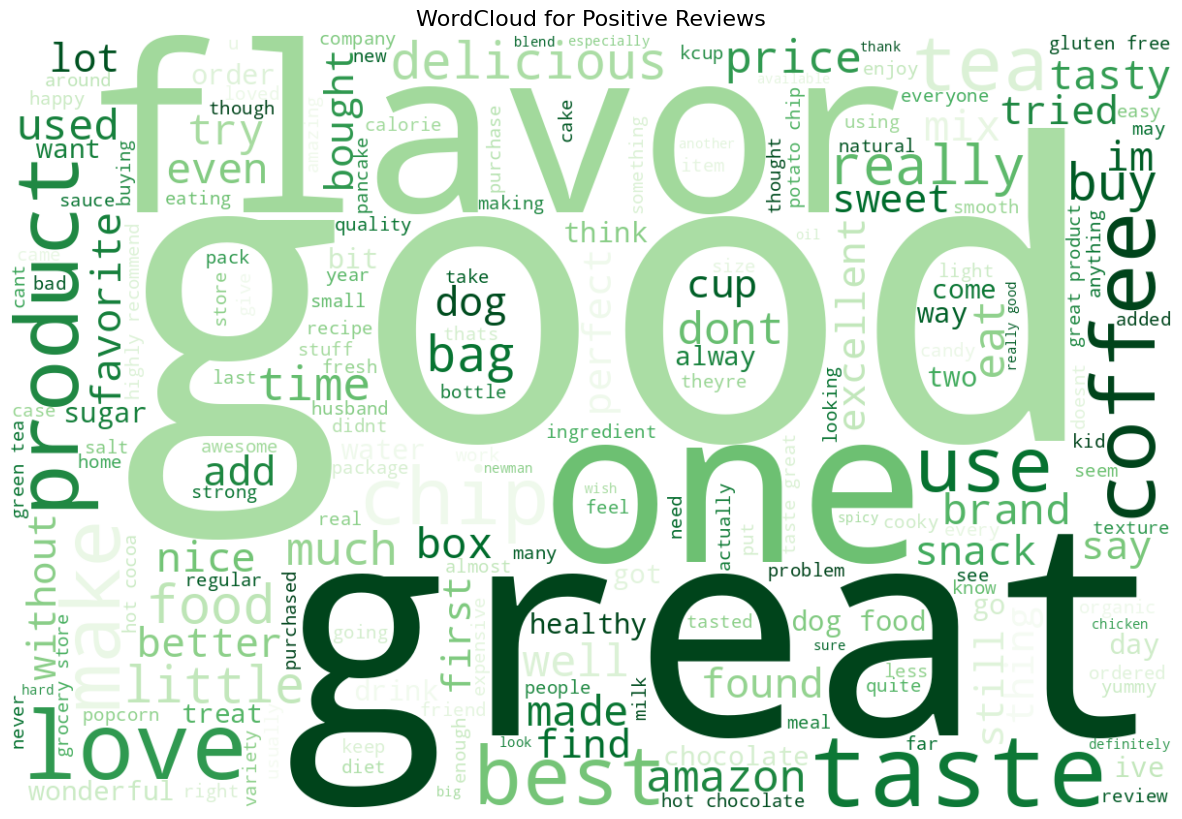

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/smc/amazon_cleaned.csv')

# Filter only positive reviews (assuming sentiment label column exists)
positive_reviews = df[df['Sentiment'] == 'positive']['full_review']

# Combine all positive reviews into one large string
text = " ".join(str(review) for review in positive_reviews)

# Create and configure WordCloud
wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='Greens').generate(text)

# Display the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews', fontsize=16)
plt.show()

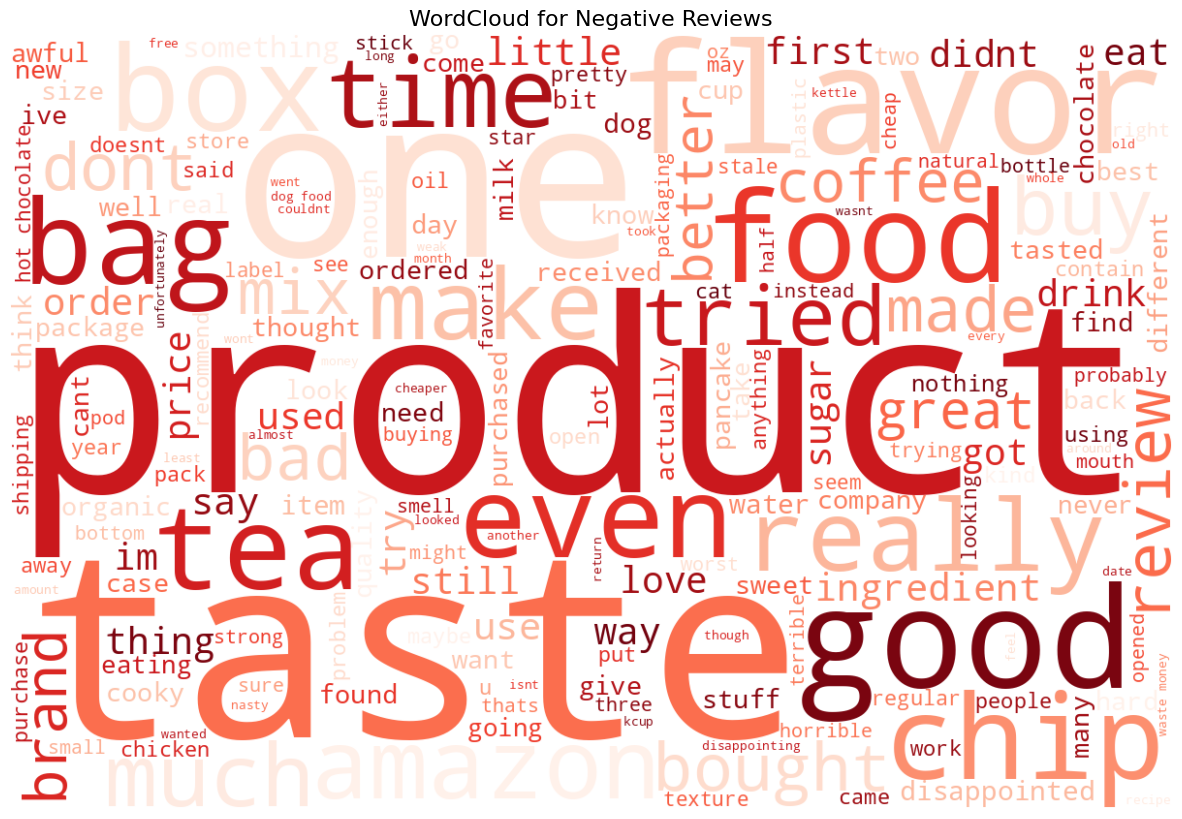

In [ ]:
# Filter only positive reviews (assuming sentiment label column exists)
negative_reviews = df[df['Sentiment'] == 'negative']['full_review']

# Combine all positive reviews into one large string
text = " ".join(str(review) for review in negative_reviews)

# Create and configure WordCloud
wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='Reds').generate(text)

# Display the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews', fontsize=16)
plt.show()

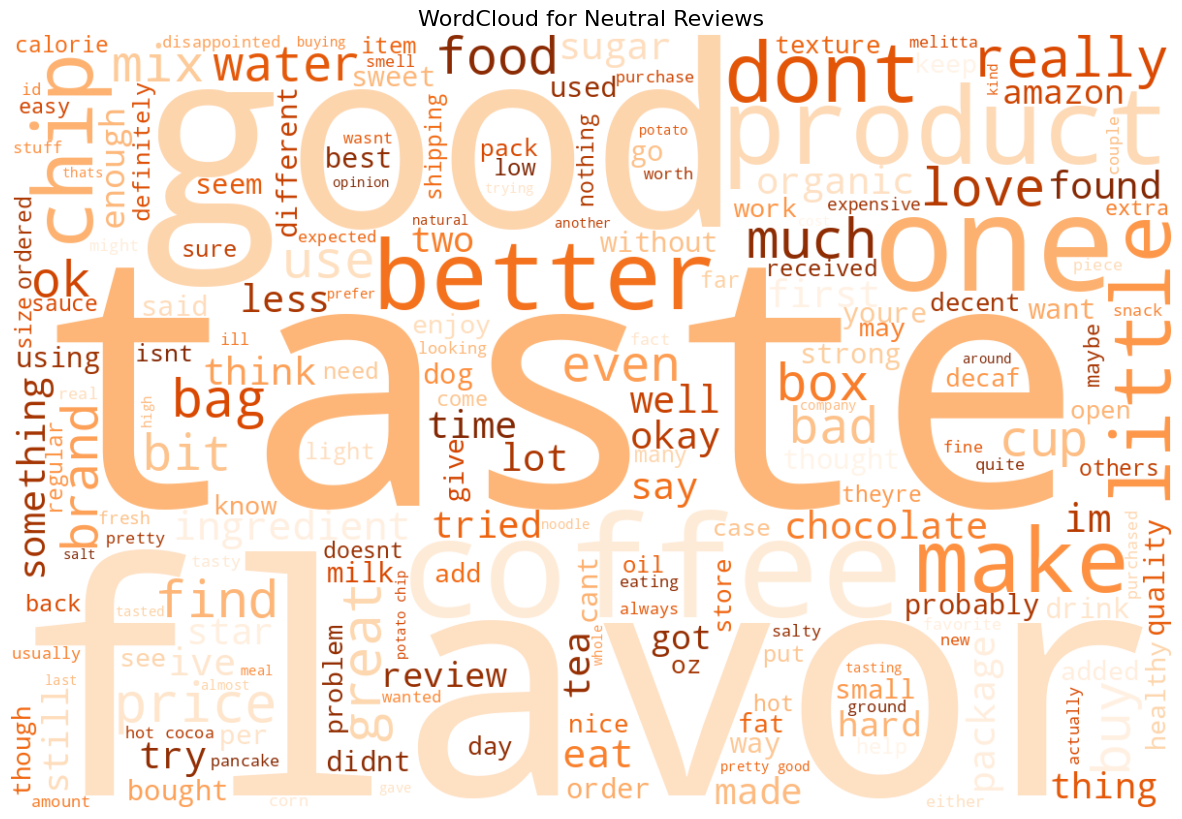

In [ ]:
# Filter only positive reviews (assuming sentiment label column exists)
neutral_reviews = df[df['Sentiment'] == 'neutral']['full_review']

# Combine all positive reviews into one large string
text = " ".join(str(review) for review in neutral_reviews)

# Create and configure WordCloud
wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='Oranges').generate(text)

# Display the WordCloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Neutral Reviews', fontsize=16)
plt.show()

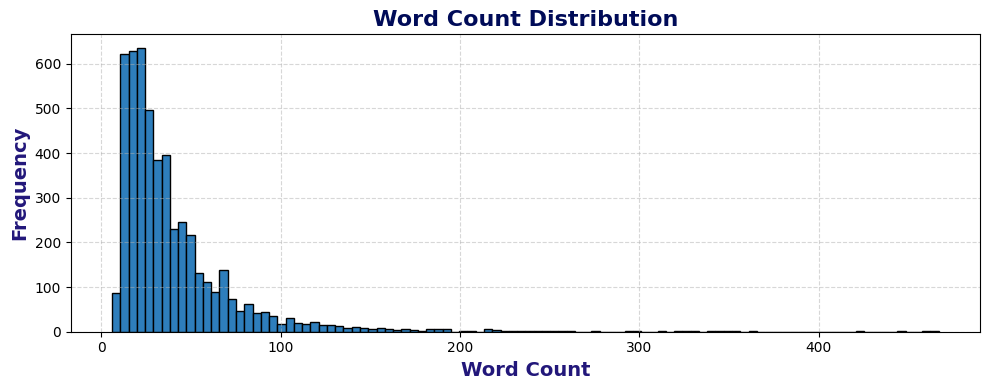

In [ ]:
color_palette = sns.color_palette("Blues", as_cmap=True)

# Calculate word counts
word_count = df['full_review'].apply(lambda x: len(str(x).split()))

# Create the figure with a specific size
fig = plt.figure(figsize=(10, 4))

# Create the histogram plot with a colorful palette
ax1 = word_count.plot(kind='hist', color=color_palette(0.7), bins=100, edgecolor='black')

# Set the title and labels with enhanced formatting
ax1.set_title('Word Count Distribution', fontsize=16, fontweight='bold', color="#000B58")
ax1.set_xlabel("Word Count", fontsize=14, fontweight='bold', color="#22177A")
ax1.set_ylabel("Frequency", fontsize=14, fontweight='bold', color="#22177A")

# Optionally, set grid and other aesthetics
ax1.grid(True, linestyle='--', alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

good 2229
like 2215
great 2120
taste 1929
flavor 1732
product 1715
love 1555
one 1521
chip 1405
food 1313
coffee 1312
tea 1126
best 1055
make 1027
would 969
bag 968
get 913
dog 904
really 899
time 817


<ipython-input-18-1644597968>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unigram_df, x='frequency', y='word', palette='viridis')


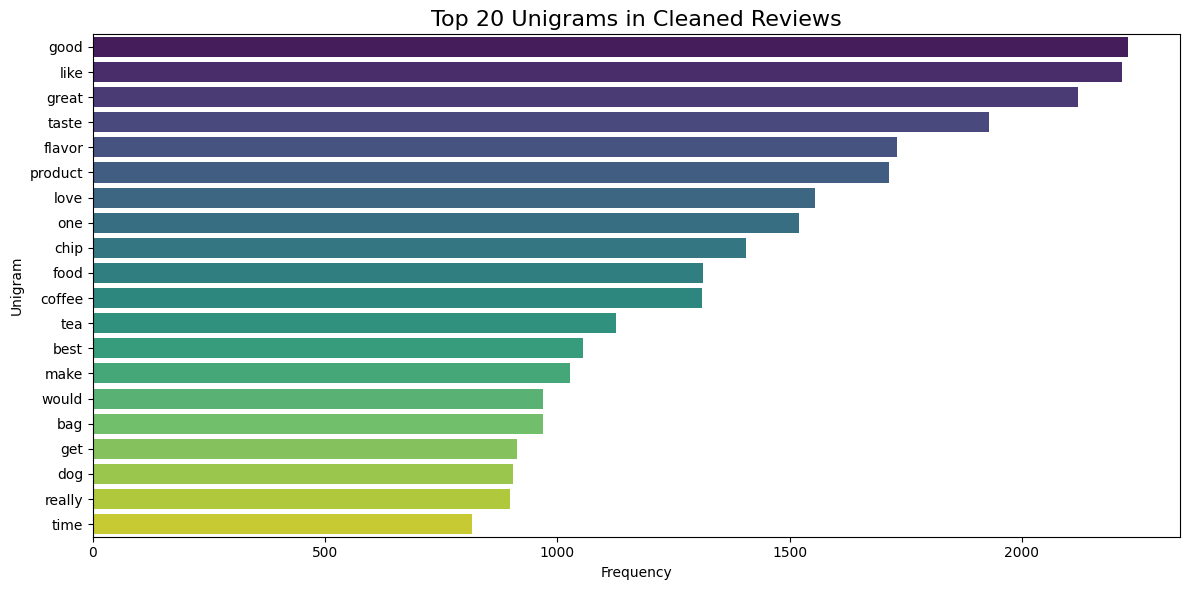

In [ ]:
from nltk.util import ngrams
from collections import Counter

def get_n_words_manual(corpus, n=None, n_words=1):
    all_ngrams = []

    for text in corpus:
        tokens = text.split()  # assumes already preprocessed into cleaned text
        n_gram = ngrams(tokens, n_words)
        all_ngrams.extend([' '.join(gram) for gram in n_gram])

    freq = Counter(all_ngrams)
    return freq.most_common(n)

top_unigrams = get_n_words_manual(df['full_review'].drop_duplicates(), n=20, n_words=1)

# Print the results
for word, count in top_unigrams:
    print(word, count)


unigram_df = pd.DataFrame(top_unigrams, columns=['word', 'frequency'])

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=unigram_df, x='frequency', y='word', palette='viridis')
plt.title('Top 20 Unigrams in Cleaned Reviews', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.tight_layout()
plt.show()

dog food 289
gluten free 234
hot chocolate 200
taste like 195
potato chip 186
hot cocoa 167
highly recommend 161
grocery store 159
great product 156
green tea 140
taste great 135
much better 127
taste good 126
ive tried 122
really good 112
year old 104
really like 101
salt vinegar 100
pretty good 99
dog love 98


<ipython-input-19-3595967982>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unigram_df, x='frequency', y='word', palette='viridis')


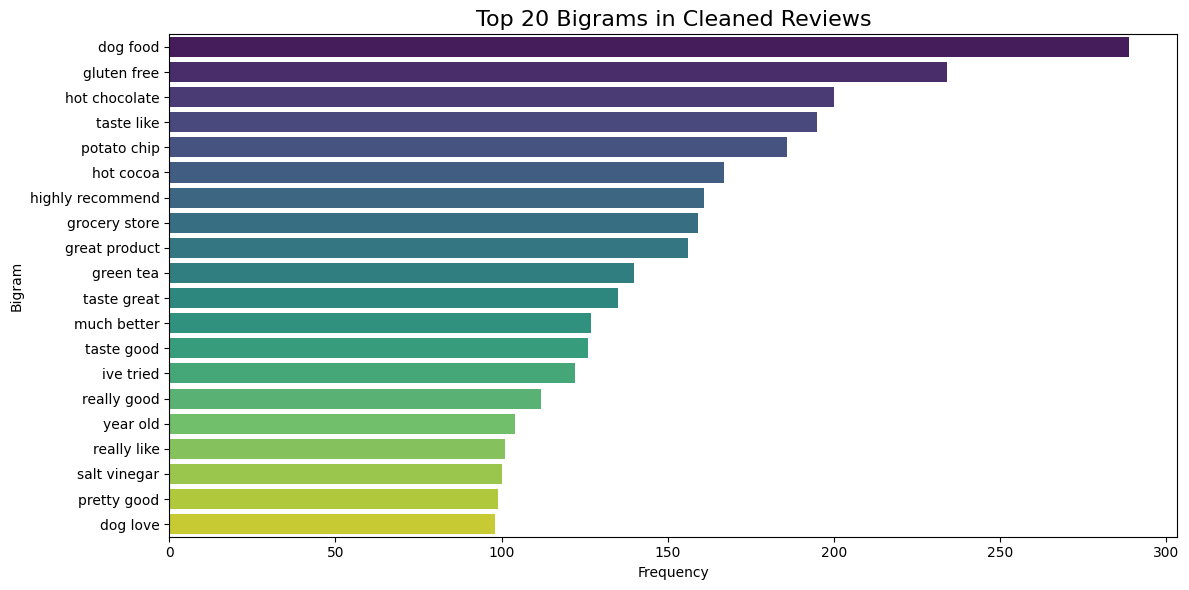

In [ ]:

top_bigrams = get_n_words_manual(df['full_review'].drop_duplicates(), n=20, n_words=2)

# Print the top bigrams and their frequencies
for phrase, count in top_bigrams:
    print(phrase, count)

unigram_df = pd.DataFrame(top_bigrams, columns=['word', 'frequency'])

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=unigram_df, x='frequency', y='word', palette='viridis')
plt.title('Top 20 Bigrams in Cleaned Reviews', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

local grocery store 52
highly recommend product 29
sea salt vinegar 29
organic dog food 29
grove square hot 28
salt vinegar chip 27
sour cream onion 26
would highly recommend 24
gluten free product 24
pancake waffle mix 22
square hot cocoa 22
gluten free bisquick 22
dog food dog 21
bob red mill 20
great dog food 19
cant go wrong 19
coconut water splash 19
dog love food 18
great product great 18
one coconut water 18


<ipython-input-20-1246874632>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unigram_df, x='frequency', y='word', palette='viridis')


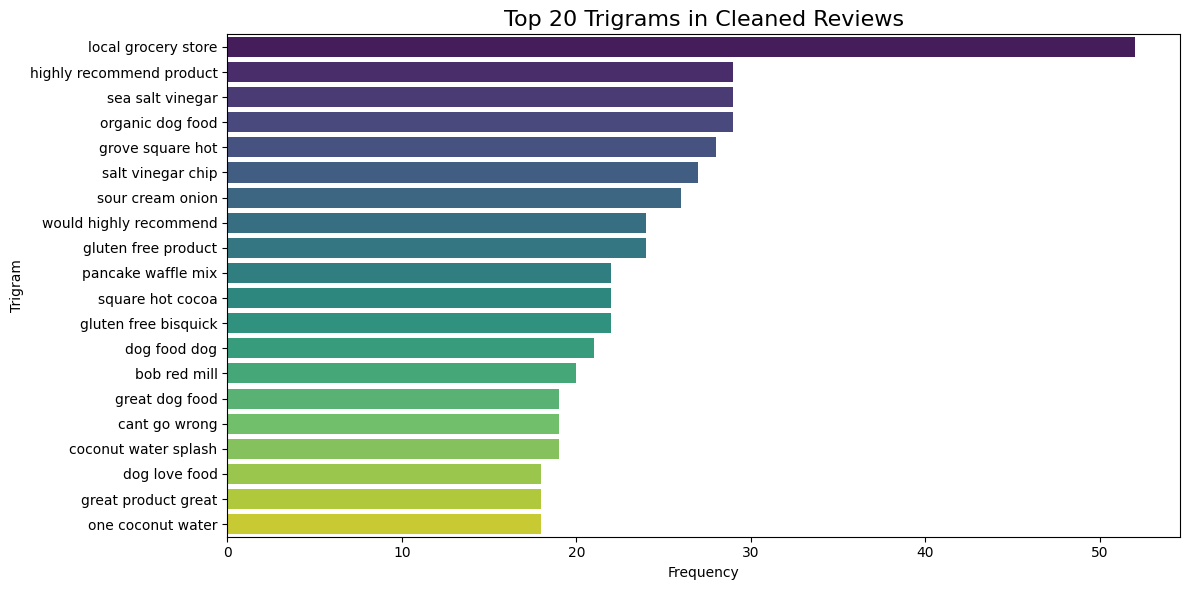

In [ ]:
# Get top 20 trigrams from cleaned text
top_trigrams = get_n_words_manual(df['full_review'].drop_duplicates(), n=20, n_words=3)

# Print the trigrams and their frequencies
for phrase, count in top_trigrams:
    print(phrase, count)

unigram_df = pd.DataFrame(top_trigrams, columns=['word', 'frequency'])

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=unigram_df, x='frequency', y='word', palette='viridis')
plt.title('Top 20 Trigrams in Cleaned Reviews', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()

In [ ]:
import spacy

# Load English tokenizer, POS tagger, parser, NER from spaCy
nlp = spacy.load("en_core_web_sm")

# Display dependency parser for first 5 reviews
for i, review in enumerate(df['Text'].head(5)):  #first 5 rows
    print(f"\n--- Review {i+1} ---")
    doc = nlp(str(review))

    for token in doc:
        print(f"{token.text:15} -> {token.dep_:10} (head: {token.head.text})")


--- Review 1 ---
I               -> nsubj      (head: bought)
have            -> aux        (head: bought)
bought          -> ROOT       (head: bought)
several         -> dobj       (head: bought)
of              -> prep       (head: several)
the             -> det        (head: products)
Vitality        -> compound   (head: products)
canned          -> amod       (head: dog)
dog             -> compound   (head: food)
food            -> compound   (head: products)
products        -> pobj       (head: of)
and             -> cc         (head: bought)
have            -> aux        (head: found)
found           -> conj       (head: bought)
them            -> nsubj      (head: be)
all             -> appos      (head: them)
to              -> aux        (head: be)
be              -> ccomp      (head: found)
of              -> prep       (head: be)
good            -> amod       (head: quality)
quality         -> pobj       (head: of)
.               -> punct      (head: bought)
The          

In [ ]:
from spacy import displacy
options = {
    "compact": True,
    "distance": 80,
    "color": "#000000",
    "bg": "#ffffff",
    "font": "Arial"
}

# Process and visualize first 5 reviews
for i, review in enumerate(df['Text'].head(5)):
    print(f"\n--- Review {i+1} ---")
    doc = nlp(str(review))
    displacy.render(doc, style="dep", jupyter=True, options=options)


--- Review 1 ---



--- Review 2 ---



--- Review 3 ---



--- Review 4 ---



--- Review 5 ---


### Feature Engineering

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/smc/amazon_cleaned.csv')

In [ ]:

# 1. Split data
X = df['full_review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- TF-IDF + SMOTE ---
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert sparse to dense for SMOTE
X_train_tfidf_dense = X_train_tfidf.toarray()
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_tfidf_resampled = smote.fit_resample(X_train_tfidf_dense, y_train)

# --- Word2Vec + SMOTE ---
# Train Word2Vec model
sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=200, window=5, min_count=5, workers=4)

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(words_vecs, axis=0) if words_vecs else np.zeros(200)

X_train_w2v = np.array([vectorize(sentence) for sentence in X_train])
X_test_w2v = np.array([vectorize(sentence) for sentence in X_test])

smote = SMOTE(random_state=42)
X_train_w2v_resampled, y_train_w2v_resampled = smote.fit_resample(X_train_w2v, y_train)


print("TF-IDF Class Distribution")
print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_train_tfidf_resampled))

print("\nWord2Vec Class Distribution")
print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_train_w2v_resampled))

TF-IDF Class Distribution
Before SMOTE: Counter({'positive': 3070, 'negative': 603, 'neutral': 314})
After SMOTE : Counter({'positive': 3070, 'negative': 3070, 'neutral': 3070})

Word2Vec Class Distribution
Before SMOTE: Counter({'positive': 3070, 'negative': 603, 'neutral': 314})
After SMOTE : Counter({'positive': 3070, 'negative': 3070, 'neutral': 3070})


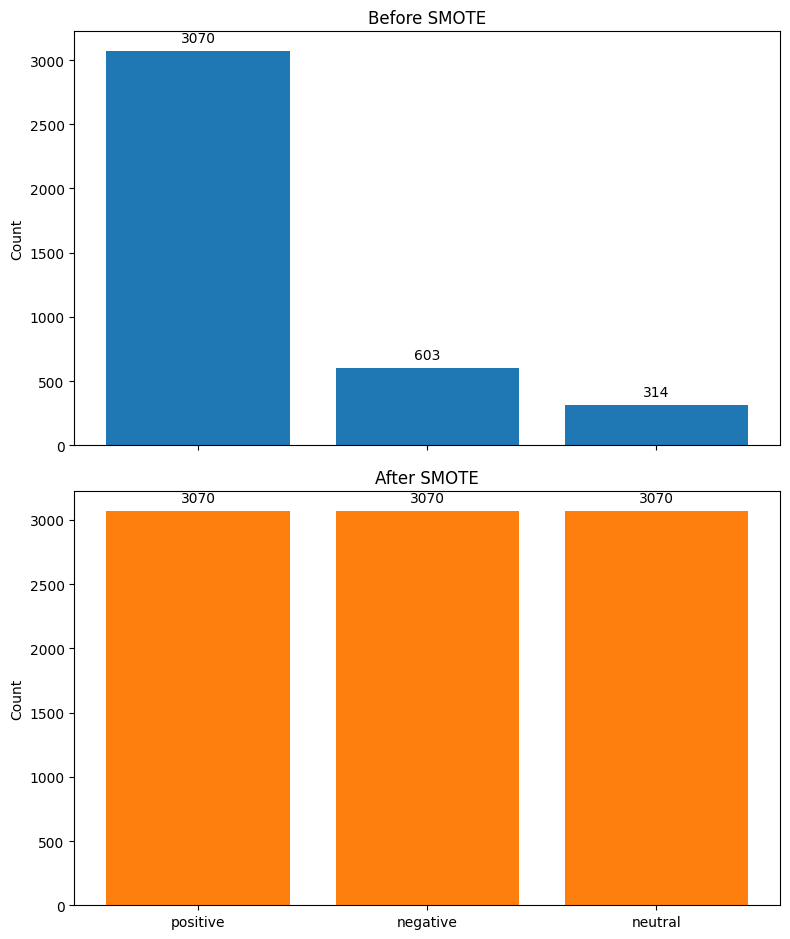

In [ ]:
classes = ['positive', 'negative', 'neutral']

before_smote = [3070, 603, 314]
after_smote = [3070, 3070, 3070]

x = np.arange(len(classes))

fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# Before SMOTE
bars_before = axs[0].bar(x, before_smote, color='tab:blue')
axs[0].set_title('Before SMOTE')
axs[0].set_ylabel('Count')

for bar in bars_before:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}', ha='center', va='bottom')

# After SMOTE
bars_after = axs[1].bar(x, after_smote, color='tab:orange')
axs[1].set_title('After SMOTE')
axs[1].set_ylabel('Count')
axs[1].set_xticks(x)
axs[1].set_xticklabels(classes)

for bar in bars_after:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}', ha='center', va='bottom')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# --- Evaluation Function ---
def evaluate_model(name, y_true, y_pred,  cmap='Blues'):
    print(f"\n{name} Results")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


## Lexicon based methods

In [ ]:
from textblob import TextBlob

# Compute polarity and subjectivity
df['polarity'] = df['full_review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['full_review'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Function to label sentiment based on polarity
def get_sentiment(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'

# Create new sentiment column
df['sentiment_textblob'] = df['polarity'].apply(get_sentiment)

accuracy = (df['sentiment_textblob'] == df['Sentiment']).mean()
print(f"TextBlob Sentiment Analysis Accuracy: {accuracy:.2%}")

# Example: Display first few rows with strength included
print(df[['full_review', 'polarity', 'sentiment_textblob']].head())

TextBlob Sentiment Analysis Accuracy: 80.56%
                                         full_review  polarity  \
0  good quality dog food bought several vitality ...  0.480000   
1  advertised product arrived labeled jumbo salte...  0.216667   
2  delight say confection around century light pi...  0.187000   
3  cough medicine looking secret ingredient robit...  0.150000   
4  great taffy great taffy great price wide assor...  0.526667   

  sentiment_textblob  
0           positive  
1           positive  
2           positive  
3           positive  
4           positive  


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize VADER
sid = SentimentIntensityAnalyzer()


# Extract compound, positive, negative, and neutral scores into separate columns
df['compound'] = df['full_review'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
df['pos_vader'] = df['full_review'].apply(lambda x: sid.polarity_scores(str(x))['pos'])
df['neu_vader'] = df['full_review'].apply(lambda x: sid.polarity_scores(str(x))['neu'])
df['neg_vader'] = df['full_review'].apply(lambda x: sid.polarity_scores(str(x))['neg'])

# Define sentiment label based on compound score
#compound score can be polarity indicator
def vader_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Create sentiment label column
df['sentiment_vader'] = df['compound'].apply(vader_sentiment_label)

accuracy_vader = (df['sentiment_vader'] == df['Sentiment']).mean()

# Print accuracy
print(f"VADER Sentiment Analysis Accuracy: {accuracy_vader:.2%}")

# Example: Display first few rows with strength included
print(df[['full_review', 'compound', 'pos_vader', 'neu_vader', 'neg_vader', 'sentiment_vader']].head())

VADER Sentiment Analysis Accuracy: 80.14%
                                         full_review  compound  pos_vader  \
0  good quality dog food bought several vitality ...    0.9565      0.496   
1  advertised product arrived labeled jumbo salte...   -0.1027      0.105   
2  delight say confection around century light pi...    0.9260      0.334   
3  cough medicine looking secret ingredient robit...    0.4404      0.132   
4  great taffy great taffy great price wide assor...    0.9661      0.661   

   neu_vader  neg_vader sentiment_vader  
0      0.504      0.000        positive  
1      0.773      0.123        negative  
2      0.545      0.121        positive  
3      0.868      0.000        positive  
4      0.339      0.000        positive  


In [ ]:
from afinn import Afinn

# Initialize Afinn
afinn = Afinn()

# Apply Afinn to calculate sentiment scores (returns a score, not a label)
df['afinn_score'] = df['full_review'].apply(lambda x: afinn.score(str(x)))

# Define sentiment label based on Afinn score
def affin_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Create sentiment label column for Afinn
#score can be the polarity
df['sentiment_affin'] = df['afinn_score'].apply(affin_sentiment_label)

# Compute accuracy for Afinn
accuracy_affin = (df['sentiment_affin'] == df['Sentiment']).mean()

# Print accuracy
print(f"Afinn Sentiment Analysis Accuracy: {accuracy_affin:.2%}")

print(df[['full_review', 'afinn_score', 'sentiment_affin']].head())

Afinn Sentiment Analysis Accuracy: 79.90%
                                         full_review  afinn_score  \
0  good quality dog food bought several vitality ...         21.0   
1  advertised product arrived labeled jumbo salte...         -2.0   
2  delight say confection around century light pi...          9.0   
3  cough medicine looking secret ingredient robit...          3.0   
4  great taffy great taffy great price wide assor...         12.0   

  sentiment_affin  
0        positive  
1        negative  
2        positive  
3        positive  
4        positive  


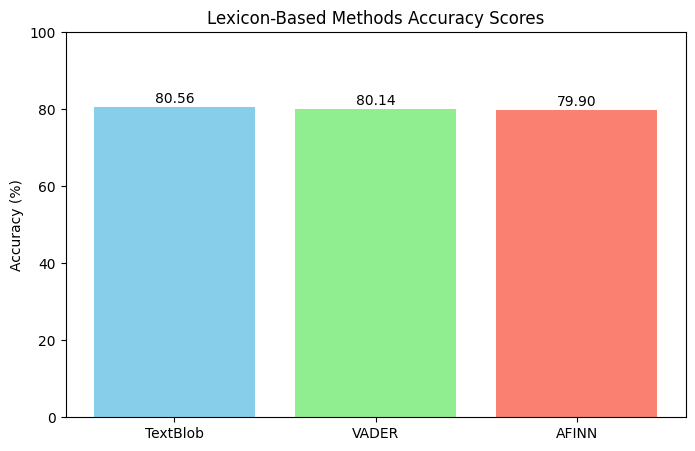

In [ ]:
tools = ['TextBlob', 'VADER', 'AFINN']
scores = [80.56, 80.14, 79.90]

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(tools, scores, color=['skyblue', 'lightgreen', 'salmon'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.2f}', ha='center', va='bottom')

plt.ylim(0, 100)
plt.title('Lexicon-Based Methods Accuracy Scores')
plt.ylabel('Accuracy (%)')
plt.show()

## Baseline Models

# Naive Bayes

### Preliminary results without sampling


TF-IDF (Naive Bayes) Results
Accuracy: 0.769307923771314
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       151
     neutral       0.00      0.00      0.00        79
    positive       0.77      1.00      0.87       767

    accuracy                           0.77       997
   macro avg       0.26      0.33      0.29       997
weighted avg       0.59      0.77      0.67       997



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


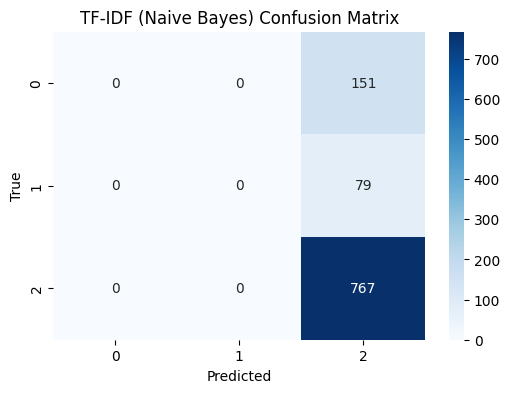


Word2Vec (Naive Bayes) Results
Accuracy: 0.36710130391173523
Classification Report:
               precision    recall  f1-score   support

    negative       0.20      0.57      0.30       151
     neutral       0.10      0.38      0.16        79
    positive       0.87      0.33      0.47       767

    accuracy                           0.37       997
   macro avg       0.39      0.43      0.31       997
weighted avg       0.71      0.37      0.42       997



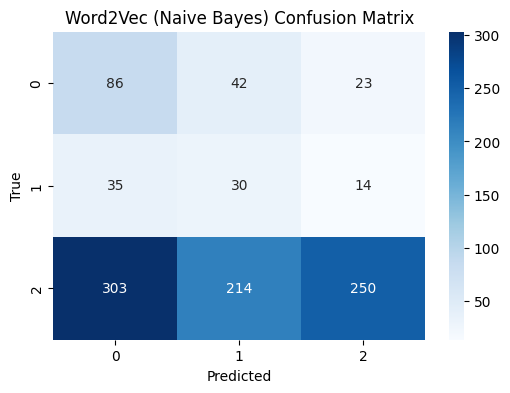

In [ ]:
# 3. Train Naive Bayes (no resampling)
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb.predict(X_test_tfidf)

nb_w2v = GaussianNB()
nb_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = nb_w2v.predict(X_test_w2v)

evaluate_model("TF-IDF (Naive Bayes)", y_test, y_pred_tfidf, cmap='Blues')
evaluate_model("Word2Vec (Naive Bayes)", y_test, y_pred_w2v, cmap='Greens')

Fail to predict 'neutral' and 'negative' sentiment. Model fully biased to 'positve' sentiment.

In [ ]:
# Naive Bayes with smote
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
# Train Naive Bayes on TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf.toarray())

from sklearn.naive_bayes import GaussianNB
nb_w2v = GaussianNB()
nb_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)
y_pred_w2v = nb_w2v.predict(X_test_w2v)


TF-IDF + SMOTE (Naive Bayes) Results
Accuracy: 0.7492477432296891
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.66      0.62       151
     neutral       0.25      0.54      0.34        79
    positive       0.92      0.79      0.85       767

    accuracy                           0.75       997
   macro avg       0.58      0.66      0.60       997
weighted avg       0.82      0.75      0.78       997



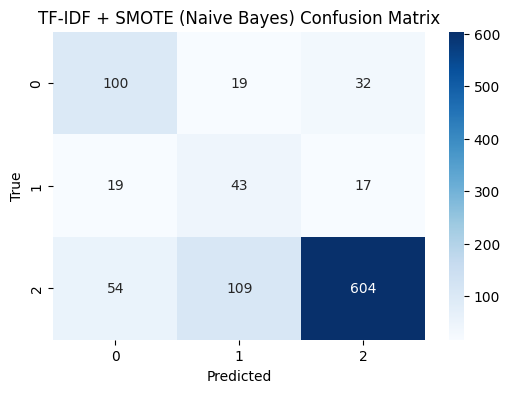


Word2Vec + SMOTE (Naive Bayes) Results
Accuracy: 0.3811434302908726
Classification Report:
               precision    recall  f1-score   support

    negative       0.22      0.45      0.29       151
     neutral       0.11      0.49      0.17        79
    positive       0.87      0.36      0.50       767

    accuracy                           0.38       997
   macro avg       0.40      0.43      0.32       997
weighted avg       0.71      0.38      0.45       997



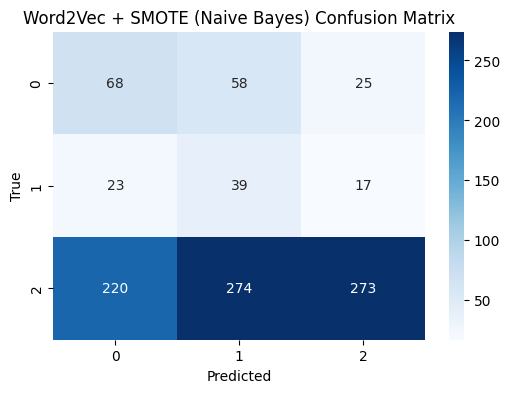

In [ ]:
evaluate_model("TF-IDF + SMOTE (Naive Bayes)", y_test, y_pred_tfidf, cmap='Blues')
evaluate_model("Word2Vec + SMOTE (Naive Bayes)", y_test, y_pred_w2v, cmap='Greens')

# Logistic Regression

In [ ]:
# Train Logistic Regression on TF-IDF
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

# Train Logistic Regression on Word2Vec
lr_w2v = LogisticRegression(max_iter=1000)
lr_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)
y_pred_w2v = lr_w2v.predict(X_test_w2v)



TF-IDF + SMOTE (Logistic Regression) Results
Accuracy: 0.8134403209628887
Classification Report:
               precision    recall  f1-score   support

    negative       0.64      0.68      0.66       151
     neutral       0.33      0.42      0.37        79
    positive       0.92      0.88      0.90       767

    accuracy                           0.81       997
   macro avg       0.63      0.66      0.64       997
weighted avg       0.83      0.81      0.82       997



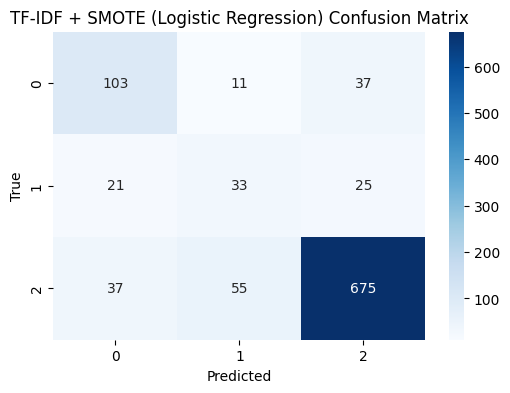


Word2Vec + SMOTE (Logistic Regression) Results
Accuracy: 0.5616850551654965
Classification Report:
               precision    recall  f1-score   support

    negative       0.29      0.46      0.36       151
     neutral       0.15      0.49      0.23        79
    positive       0.91      0.59      0.72       767

    accuracy                           0.56       997
   macro avg       0.45      0.51      0.43       997
weighted avg       0.76      0.56      0.62       997



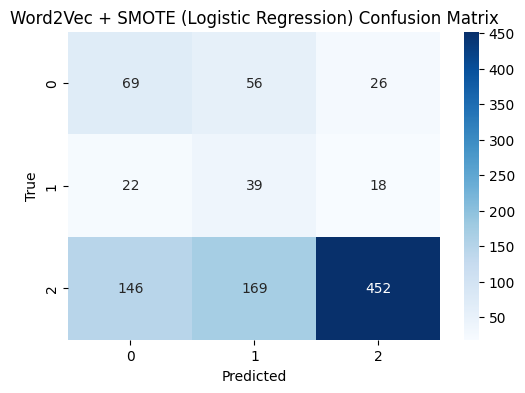

In [ ]:
evaluate_model("TF-IDF + SMOTE (Logistic Regression)", y_test, y_pred_tfidf, cmap='Blues')
evaluate_model("Word2Vec + SMOTE (Logistic Regression)", y_test, y_pred_w2v, cmap='Greens')

# Decision Tree

In [ ]:
# --- TF-IDF + SMOTE + Decision Tree ---
dt_tfidf = DecisionTreeClassifier(random_state=42)
dt_tfidf.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
y_pred_tfidf = dt_tfidf.predict(X_test_tfidf.toarray())


# --- Word2Vec + SMOTE + Decision Tree ---
dt_w2v = DecisionTreeClassifier(random_state=42)
dt_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)
y_pred_w2v = dt_w2v.predict(X_test_w2v)



TF-IDF + SMOTE (Decision Tree) Results
Accuracy: 0.6810431293881645
Classification Report:
               precision    recall  f1-score   support

    negative       0.33      0.38      0.35       151
     neutral       0.14      0.18      0.15        79
    positive       0.84      0.79      0.82       767

    accuracy                           0.68       997
   macro avg       0.44      0.45      0.44       997
weighted avg       0.71      0.68      0.69       997



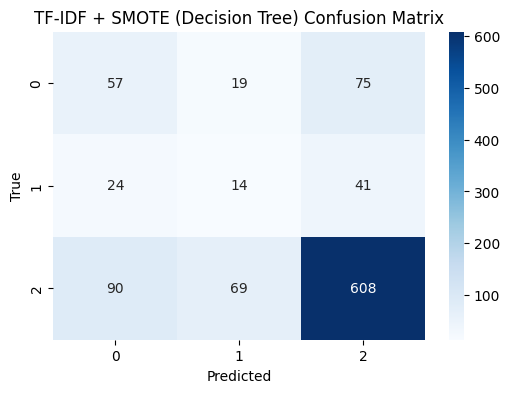


Word2Vec + SMOTE (Decision Tree) Results
Accuracy: 0.5877632898696088
Classification Report:
               precision    recall  f1-score   support

    negative       0.24      0.35      0.28       151
     neutral       0.11      0.19      0.14        79
    positive       0.82      0.68      0.74       767

    accuracy                           0.59       997
   macro avg       0.39      0.41      0.39       997
weighted avg       0.68      0.59      0.62       997



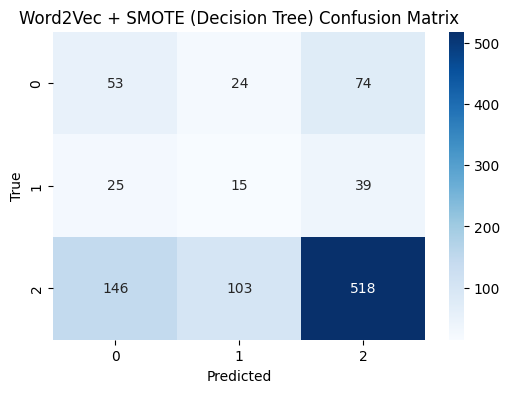

In [ ]:
evaluate_model("TF-IDF + SMOTE (Decision Tree)", y_test, y_pred_tfidf, cmap='Blues')
evaluate_model("Word2Vec + SMOTE (Decision Tree)", y_test, y_pred_w2v, cmap='Greens')


# K Fold CV

In [ ]:
def kfold_smote_cv(X, y, model, n_splits=10, random_state=42):
    y_array = np.array(y)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    accuracies = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y_array), 1):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y_array[train_idx], y_array[val_idx]

        # Apply SMOTE only on training fold
        sm = SMOTE(random_state=random_state)
        X_train_resampled, y_train_resampled = sm.fit_resample(X_train_fold, y_train_fold)

        # Train model
        model.fit(X_train_resampled, y_train_resampled)

        # Predict and evaluate
        y_pred = model.predict(X_val_fold)
        acc = accuracy_score(y_val_fold, y_pred)
        accuracies.append(acc)

        print(f"Fold {fold}: Accuracy = {acc:.4f}")

    avg_acc = np.mean(accuracies)
    print(f"\nAverage Accuracy: {avg_acc:.4f}")

    return accuracies, avg_acc

# Naive Bayes

In [ ]:
model = MultinomialNB()
accuracies, avg_accuracy = kfold_smote_cv(X_train_tfidf.toarray(), y_train, model)
model2= GaussianNB()
accuracies, avg_accuracy = kfold_smote_cv(X_train_w2v, y_train, model2)

Fold 1: Accuracy = 0.7056
Fold 2: Accuracy = 0.7197
Fold 3: Accuracy = 0.7406
Fold 4: Accuracy = 0.7469
Fold 5: Accuracy = 0.7280
Fold 6: Accuracy = 0.7469
Fold 7: Accuracy = 0.7552
Fold 8: Accuracy = 0.7866
Fold 9: Accuracy = 0.7469
Fold 10: Accuracy = 0.7657

Average Accuracy: 0.7442
Fold 1: Accuracy = 0.3779
Fold 2: Accuracy = 0.3724
Fold 3: Accuracy = 0.3787
Fold 4: Accuracy = 0.4079
Fold 5: Accuracy = 0.4059
Fold 6: Accuracy = 0.3849
Fold 7: Accuracy = 0.3452
Fold 8: Accuracy = 0.3766
Fold 9: Accuracy = 0.3870
Fold 10: Accuracy = 0.3933

Average Accuracy: 0.3830


# Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
accuracies, avg_accuracy = kfold_smote_cv(X_train_tfidf.toarray(), y_train, model)
model2 = LogisticRegression(max_iter=1000, random_state=42)
accuracies, avg_accuracy = kfold_smote_cv(X_train_w2v, y_train, model2)

Fold 1: Accuracy = 0.7704
Fold 2: Accuracy = 0.8013
Fold 3: Accuracy = 0.8054
Fold 4: Accuracy = 0.8285
Fold 5: Accuracy = 0.7992
Fold 6: Accuracy = 0.8389
Fold 7: Accuracy = 0.8180
Fold 8: Accuracy = 0.8347
Fold 9: Accuracy = 0.8347
Fold 10: Accuracy = 0.8389

Average Accuracy: 0.8170
Fold 1: Accuracy = 0.5658
Fold 2: Accuracy = 0.5649
Fold 3: Accuracy = 0.6004
Fold 4: Accuracy = 0.6109
Fold 5: Accuracy = 0.5858
Fold 6: Accuracy = 0.5565
Fold 7: Accuracy = 0.5607
Fold 8: Accuracy = 0.5690
Fold 9: Accuracy = 0.5502
Fold 10: Accuracy = 0.5732

Average Accuracy: 0.5737


In [ ]:
# Define pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Define hyperparameter search space
param_distributions = {
    'clf__C': uniform(loc=0.01, scale=10),  # Inverse of regularization strength
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'saga']
}

# K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring
scorer = make_scorer(accuracy_score)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=5,
    scoring=scorer,
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42
)

# Run on TF-IDF
random_search.fit(X_train_tfidf.toarray(), y_train)

print("\nBest Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Parameters: {'clf__C': 5.996584841970366, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best CV Accuracy: 0.8221752624975236


In [ ]:
# Best parameters from RandomizedSearchCV
best_C = 5.996584841970366
best_penalty = 'l2'
best_solver = 'lbfgs'

# --- Train Logistic Regression on TF-IDF ---
lr_tfidf = LogisticRegression(
    C=best_C,
    penalty=best_penalty,
    solver=best_solver,
    max_iter=1000,
    random_state=42
)
lr_tfidf.fit(X_train_tfidf_resampled, y_train_tfidf_resampled)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

# --- Train Logistic Regression on Word2Vec ---
lr_w2v = LogisticRegression(
    C=best_C,
    penalty=best_penalty,
    solver=best_solver,
    max_iter=1000,
    random_state=42
)
lr_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)
y_pred_w2v = lr_w2v.predict(X_test_w2v)


TF-IDF + SMOTE (Logistic Regression) Results
Accuracy: 0.8234704112337011
Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.65      0.66       151
     neutral       0.33      0.35      0.34        79
    positive       0.91      0.91      0.91       767

    accuracy                           0.82       997
   macro avg       0.64      0.64      0.64       997
weighted avg       0.83      0.82      0.82       997



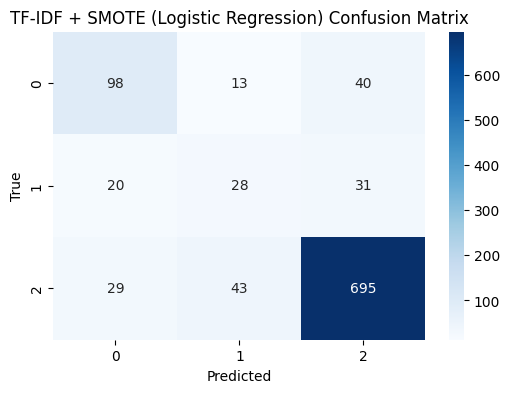


Word2Vec + SMOTE (Logistic Regression) Results
Accuracy: 0.6018054162487463
Classification Report:
               precision    recall  f1-score   support

    negative       0.32      0.48      0.38       151
     neutral       0.16      0.48      0.24        79
    positive       0.92      0.64      0.75       767

    accuracy                           0.60       997
   macro avg       0.47      0.53      0.46       997
weighted avg       0.77      0.60      0.66       997



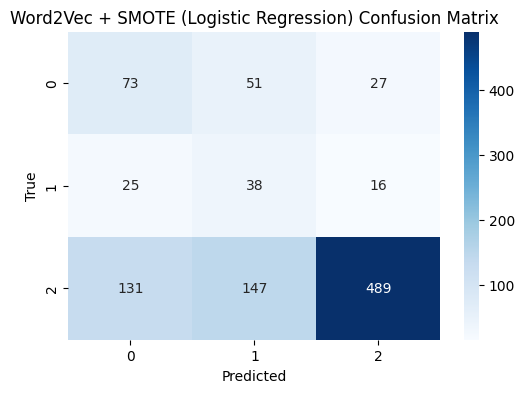

In [ ]:
# Now evaluate
evaluate_model("TF-IDF + SMOTE (Logistic Regression)", y_test, y_pred_tfidf, cmap='Blues')
evaluate_model("Word2Vec + SMOTE (Logistic Regression)", y_test, y_pred_w2v, cmap='Greens')

# Decision Tree

In [ ]:
# TF-IDF + SMOTE + Decision Tree
dt_model_tfidf = DecisionTreeClassifier(random_state=42)
accuracies_tfidf, avg_accuracy_tfidf = kfold_smote_cv(X_train_tfidf.toarray(), y_train, dt_model_tfidf)

# Word2Vec + SMOTE + Decision Tree
dt_model_w2v = DecisionTreeClassifier(random_state=42)
accuracies_w2v, avg_accuracy_w2v = kfold_smote_cv(X_train_w2v, y_train, dt_model_w2v)


Fold 1: Accuracy = 0.6514
Fold 2: Accuracy = 0.6674
Fold 3: Accuracy = 0.6820
Fold 4: Accuracy = 0.6967
Fold 5: Accuracy = 0.7238
Fold 6: Accuracy = 0.6967
Fold 7: Accuracy = 0.6611
Fold 8: Accuracy = 0.6904
Fold 9: Accuracy = 0.7176
Fold 10: Accuracy = 0.6925

Average Accuracy: 0.6879
Fold 1: Accuracy = 0.5804
Fold 2: Accuracy = 0.5607
Fold 3: Accuracy = 0.5795
Fold 4: Accuracy = 0.5711
Fold 5: Accuracy = 0.5732
Fold 6: Accuracy = 0.5858
Fold 7: Accuracy = 0.5732
Fold 8: Accuracy = 0.5439
Fold 9: Accuracy = 0.5795
Fold 10: Accuracy = 0.5523

Average Accuracy: 0.5700


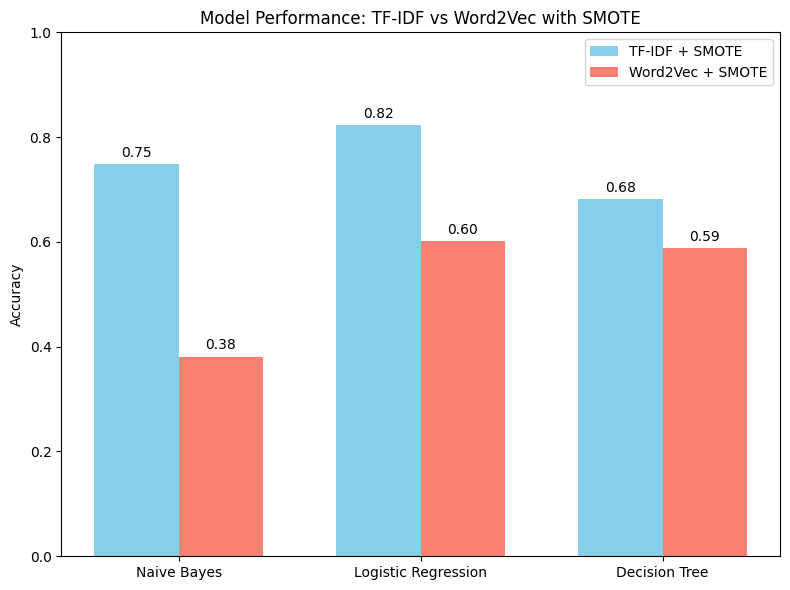

In [ ]:
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree']
tfidf_acc = [0.749, 0.823, 0.681]
w2v_acc = [0.381, 0.602, 0.588]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, tfidf_acc, width, label='TF-IDF + SMOTE', color='skyblue')
bars2 = ax.bar(x + width/2, w2v_acc, width, label='Word2Vec + SMOTE', color='salmon')

# Add labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance: TF-IDF vs Word2Vec with SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Bert

In [ ]:
!pip install torchinfo

In [ ]:

# Parameters
MAX_LEN = 128
BATCH_SIZE = 32
EPOCHS = 20
PATIENCE = 3

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")

# Encode sentiment labels
label_encoder = LabelEncoder()
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['Sentiment'], random_state=42)
train_df['label'] = label_encoder.fit_transform(train_df['Sentiment'])
val_df['label'] = label_encoder.transform(val_df['Sentiment'])

Using device: cuda
GPU name: Tesla T4


In [ ]:
# Load tokenizer and model (BERT)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label_encoder.classes_)
).to(device)

# Custom dataset class
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            add_special_tokens=True,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Create dataloaders
train_dataset = ReviewDataset(train_df['full_review'].values, train_df['label'].values, tokenizer, MAX_LEN)
val_dataset = ReviewDataset(val_df['full_review'].values, val_df['label'].values, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, pin_memory=True)

# Optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
# Focal Loss
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=1.0, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce = torch.nn.CrossEntropyLoss(reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        return focal_loss

loss_fn = FocalLoss().to(device)

In [ ]:
# Tracking
train_losses = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')
early_stopping_counter = 0

# Training loop
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device, non_blocking=True)
        attention_mask = batch['attention_mask'].to(device, non_blocking=True)
        labels = batch['labels'].to(device, non_blocking=True)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Training loss: {avg_train_loss:.4f}")

    model.eval()
    total_val_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, labels)
            total_val_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            total_predictions += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    val_accuracy = correct_predictions.double() / total_predictions
    val_accuracies.append(val_accuracy.item())

    print(f"Validation loss: {avg_val_loss:.4f}")
    print(f"Validation accuracy: {val_accuracy:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
        print("Best model saved!")
    else:
        early_stopping_counter += 1
        print(f"No improvement. Early stopping counter: {early_stopping_counter}/{PATIENCE}")
        if early_stopping_counter >= PATIENCE:
            print("Early stopping triggered.")
            break

    torch.cuda.empty_cache()
    gc.collect()


Epoch 1/20


100%|██████████| 125/125 [00:46<00:00,  2.67it/s]


Training loss: 0.2817
Validation loss: 0.2082
Validation accuracy: 0.8375
Best model saved!

Epoch 2/20


100%|██████████| 125/125 [00:47<00:00,  2.66it/s]


Training loss: 0.1988
Validation loss: 0.1887
Validation accuracy: 0.8485
Best model saved!

Epoch 3/20


100%|██████████| 125/125 [00:47<00:00,  2.64it/s]


Training loss: 0.1579
Validation loss: 0.1896
Validation accuracy: 0.8616
No improvement. Early stopping counter: 1/3

Epoch 4/20


100%|██████████| 125/125 [00:47<00:00,  2.64it/s]


Training loss: 0.1321
Validation loss: 0.1881
Validation accuracy: 0.8566
Best model saved!

Epoch 5/20


100%|██████████| 125/125 [00:47<00:00,  2.64it/s]


Training loss: 0.0957
Validation loss: 0.2157
Validation accuracy: 0.8435
No improvement. Early stopping counter: 1/3

Epoch 6/20


100%|██████████| 125/125 [00:47<00:00,  2.64it/s]


Training loss: 0.0846
Validation loss: 0.2244
Validation accuracy: 0.8215
No improvement. Early stopping counter: 2/3

Epoch 7/20


100%|██████████| 125/125 [00:47<00:00,  2.64it/s]


Training loss: 0.0570
Validation loss: 0.2937
Validation accuracy: 0.8185
No improvement. Early stopping counter: 3/3
Early stopping triggered.


In [ ]:
# Create dummy inputs with correct types and shapes
dummy_input_ids = torch.randint(0, 30522, (BATCH_SIZE, MAX_LEN), dtype=torch.long).to(device)
dummy_attention_mask = torch.ones((BATCH_SIZE, MAX_LEN), dtype=torch.long).to(device)

# Run model summary
summary(
    model,
    input_data={"input_ids": dummy_input_ids, "attention_mask": dummy_attention_mask},
    col_names=["input_size", "output_size", "num_params"]
)

Layer (type:depth-idx)                                       Input Shape               Output Shape              Param #
BertForSequenceClassification                                --                        [32, 3]                   --
├─BertModel: 1-1                                             [32, 128]                 [32, 768]                 --
│    └─BertEmbeddings: 2-1                                   --                        [32, 128, 768]            --
│    │    └─Embedding: 3-1                                   [32, 128]                 [32, 128, 768]            23,440,896
│    │    └─Embedding: 3-2                                   [32, 128]                 [32, 128, 768]            1,536
│    │    └─Embedding: 3-3                                   [1, 128]                  [1, 128, 768]             393,216
│    │    └─LayerNorm: 3-4                                   [32, 128, 768]            [32, 128, 768]            1,536
│    │    └─Dropout: 3-5                        

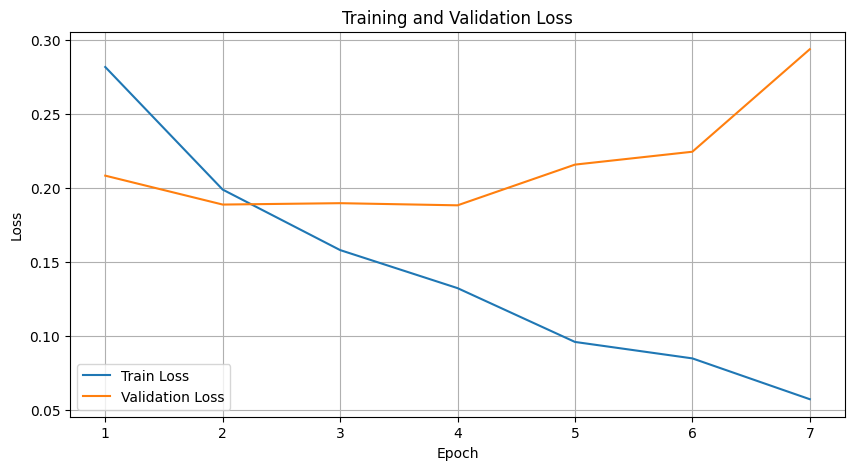

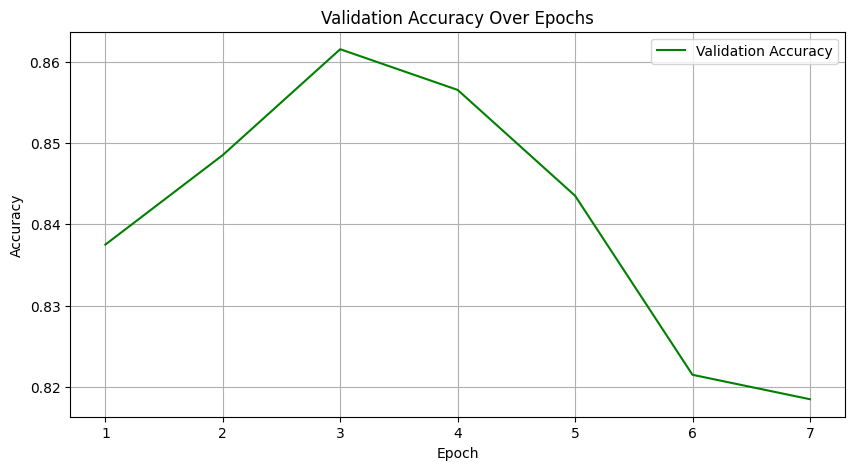

In [ ]:
# Get actual number of epochs run
epochs_ran = len(train_losses)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs_ran + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.legend()
plt.show()


Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.64      0.66       151
     neutral       0.51      0.23      0.32        79
    positive       0.90      0.96      0.93       767

    accuracy                           0.86       997
   macro avg       0.70      0.61      0.64       997
weighted avg       0.84      0.86      0.84       997



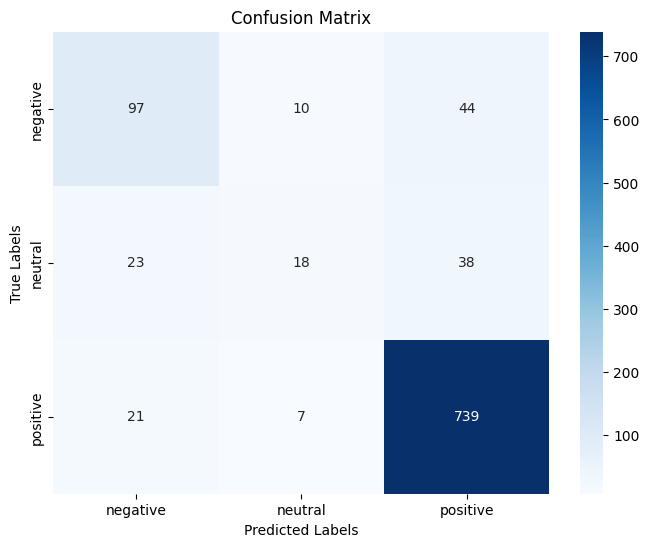

In [ ]:
# Load the best model
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

all_preds = []
all_labels = []

# Evaluation on validation set
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Print classification report
print("\nValidation Classification Report:")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Roberta

In [ ]:
# Get unique integer labels from the encoded training labels
unique_labels = np.unique(train_df['label'])

# Load tokenizer and model (RoBERTa)
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=len(label_encoder.classes_)
).to(device)

# Custom dataset class
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            add_special_tokens=True,
            return_token_type_ids=False,  # Important for RoBERTa
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Create dataloaders
train_dataset = ReviewDataset(train_df['full_review'].values, train_df['label'].values, tokenizer, MAX_LEN)
val_dataset = ReviewDataset(val_df['full_review'].values, val_df['label'].values, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, pin_memory=True)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()



In [ ]:
# Tracking
train_losses = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')
early_stopping_counter = 0

# Training loop
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device, non_blocking=True)
        attention_mask = batch['attention_mask'].to(device, non_blocking=True)
        labels = batch['labels'].to(device, non_blocking=True)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Training loss: {avg_train_loss:.4f}")

    model.eval()
    total_val_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, labels)
            total_val_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            total_predictions += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    val_accuracy = correct_predictions.double() / total_predictions
    val_accuracies.append(val_accuracy.item())

    print(f"Validation loss: {avg_val_loss:.4f}")
    print(f"Validation accuracy: {val_accuracy:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
        print("Best model saved!")
    else:
        early_stopping_counter += 1
        print(f"No improvement. Early stopping counter: {early_stopping_counter}/{PATIENCE}")
        if early_stopping_counter >= PATIENCE:
            print("Early stopping triggered.")
            break

    torch.cuda.empty_cache()
    gc.collect()



Epoch 1/20


100%|██████████| 125/125 [00:47<00:00,  2.66it/s]


Training loss: 0.7012
Validation loss: 0.6102
Validation accuracy: 0.7693
Best model saved!

Epoch 2/20


100%|██████████| 125/125 [00:47<00:00,  2.64it/s]


Training loss: 0.5303
Validation loss: 0.4818
Validation accuracy: 0.8185
Best model saved!

Epoch 3/20


100%|██████████| 125/125 [00:47<00:00,  2.63it/s]


Training loss: 0.4428
Validation loss: 0.4783
Validation accuracy: 0.8275
Best model saved!

Epoch 4/20


100%|██████████| 125/125 [00:47<00:00,  2.63it/s]


Training loss: 0.3790
Validation loss: 0.4610
Validation accuracy: 0.8536
Best model saved!

Epoch 5/20


100%|██████████| 125/125 [00:47<00:00,  2.63it/s]


Training loss: 0.3334
Validation loss: 0.4716
Validation accuracy: 0.8365
No improvement. Early stopping counter: 1/3

Epoch 6/20


100%|██████████| 125/125 [00:47<00:00,  2.62it/s]


Training loss: 0.2959
Validation loss: 0.5118
Validation accuracy: 0.8285
No improvement. Early stopping counter: 2/3

Epoch 7/20


100%|██████████| 125/125 [00:47<00:00,  2.62it/s]


Training loss: 0.2754
Validation loss: 0.6493
Validation accuracy: 0.7884
No improvement. Early stopping counter: 3/3
Early stopping triggered.


In [ ]:
# Summary
dummy_input_ids = torch.randint(0, tokenizer.vocab_size, (BATCH_SIZE, MAX_LEN), dtype=torch.long).to(device)
dummy_attention_mask = torch.ones((BATCH_SIZE, MAX_LEN), dtype=torch.long).to(device)

summary(
    model,
    input_data={"input_ids": dummy_input_ids, "attention_mask": dummy_attention_mask},
    col_names=["input_size", "output_size", "num_params"]
)

Layer (type:depth-idx)                                            Input Shape               Output Shape              Param #
RobertaForSequenceClassification                                  --                        [32, 3]                   --
├─RobertaModel: 1-1                                               [32, 128]                 [32, 128, 768]            --
│    └─RobertaEmbeddings: 2-1                                     --                        [32, 128, 768]            --
│    │    └─Embedding: 3-1                                        [32, 128]                 [32, 128, 768]            38,603,520
│    │    └─Embedding: 3-2                                        [32, 128]                 [32, 128, 768]            768
│    │    └─Embedding: 3-3                                        [32, 128]                 [32, 128, 768]            394,752
│    │    └─LayerNorm: 3-4                                        [32, 128, 768]            [32, 128, 768]            1,536
│    │    

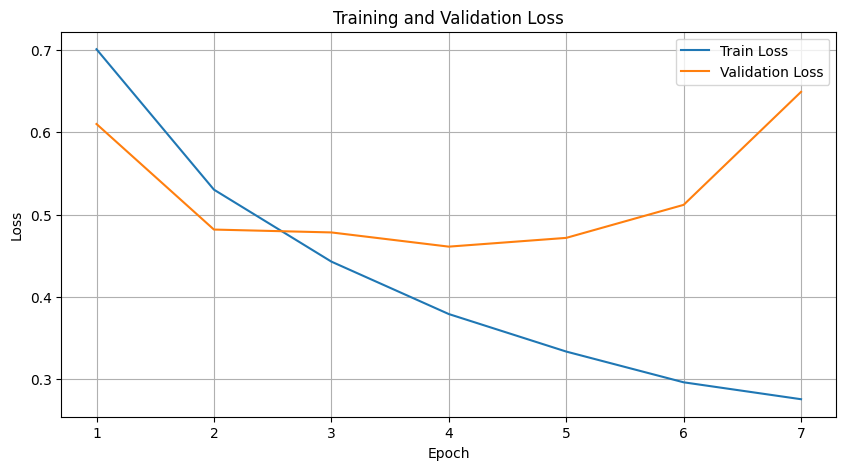

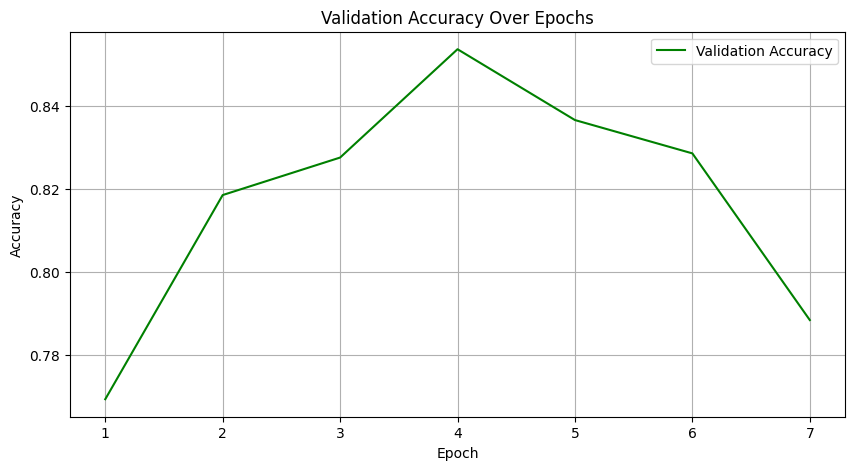

In [ ]:
epochs_ran = len(train_losses)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs_ran + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.legend()
plt.show()


Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.68      0.68       151
     neutral       0.55      0.14      0.22        79
    positive       0.89      0.96      0.92       767

    accuracy                           0.85       997
   macro avg       0.71      0.59      0.61       997
weighted avg       0.83      0.85      0.83       997



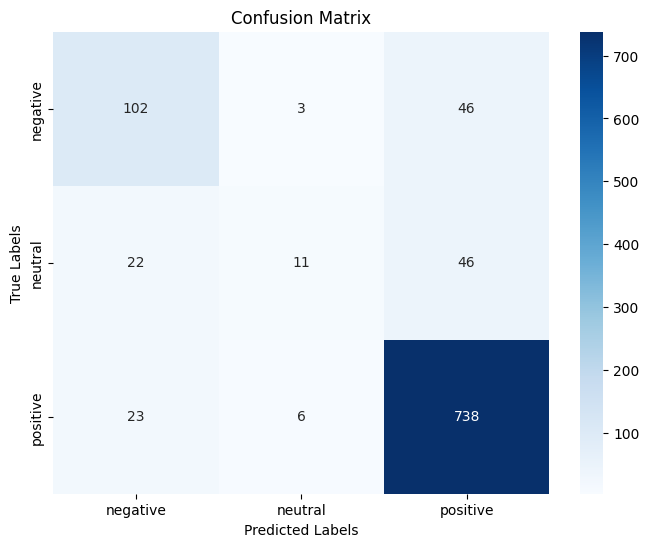

In [ ]:
# Load the best model
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

all_preds = []
all_labels = []

# Evaluation on validation set
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Print classification report
print("\nValidation Classification Report:")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## DistilBert

In [ ]:
# Load tokenizer and model
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(label_encoder.classes_)
).to(device)


# Dataloaders
train_dataset = ReviewDataset(train_df['full_review'].values, train_df['label'].values, tokenizer, MAX_LEN)
val_dataset = ReviewDataset(val_df['full_review'].values, val_df['label'].values, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, pin_memory=True)

# Optimizer and loss
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

train_losses = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')
early_stopping_counter = 0

# Training loop
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device, non_blocking=True)
        attention_mask = batch['attention_mask'].to(device, non_blocking=True)
        labels = batch['labels'].to(device, non_blocking=True)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, labels)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Training loss: {avg_train_loss:.4f}")

    model.eval()
    total_val_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, labels)
            total_val_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            total_predictions += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    val_accuracy = correct_predictions.double() / total_predictions
    val_accuracies.append(val_accuracy.item())

    print(f"Validation loss: {avg_val_loss:.4f}")
    print(f"Validation accuracy: {val_accuracy:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
        print("Best model saved!")
    else:
        early_stopping_counter += 1
        print(f"No improvement. Early stopping counter: {early_stopping_counter}/{PATIENCE}")
        if early_stopping_counter >= PATIENCE:
            print("Early stopping triggered.")
            break

    torch.cuda.empty_cache()
    gc.collect()




Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/20


100%|██████████| 125/125 [00:38<00:00,  3.26it/s]


Training loss: 0.6197
Validation loss: 0.4586
Validation accuracy: 0.8345
Best model saved!

Epoch 2/20


100%|██████████| 125/125 [00:40<00:00,  3.12it/s]


Training loss: 0.3904
Validation loss: 0.4324
Validation accuracy: 0.8576
Best model saved!

Epoch 3/20


100%|██████████| 125/125 [00:38<00:00,  3.21it/s]


Training loss: 0.2871
Validation loss: 0.4705
Validation accuracy: 0.8465
No improvement. Early stopping counter: 1/3

Epoch 4/20


100%|██████████| 125/125 [00:39<00:00,  3.17it/s]


Training loss: 0.2018
Validation loss: 0.5282
Validation accuracy: 0.8395
No improvement. Early stopping counter: 2/3

Epoch 5/20


100%|██████████| 125/125 [00:39<00:00,  3.19it/s]


Training loss: 0.1910
Validation loss: 0.5598
Validation accuracy: 0.8064
No improvement. Early stopping counter: 3/3
Early stopping triggered.


In [ ]:
# Summary
dummy_input_ids = torch.randint(0, tokenizer.vocab_size, (BATCH_SIZE, MAX_LEN), dtype=torch.long).to(device)
dummy_attention_mask = torch.ones((BATCH_SIZE, MAX_LEN), dtype=torch.long).to(device)

summary(
    model,
    input_data={"input_ids": dummy_input_ids, "attention_mask": dummy_attention_mask},
    col_names=["input_size", "output_size", "num_params"]
)

Layer (type:depth-idx)                                  Input Shape               Output Shape              Param #
DistilBertForSequenceClassification                     --                        [32, 3]                   --
├─DistilBertModel: 1-1                                  --                        [32, 128, 768]            --
│    └─Embeddings: 2-1                                  [32, 128]                 [32, 128, 768]            --
│    │    └─Embedding: 3-1                              [32, 128]                 [32, 128, 768]            23,440,896
│    │    └─Embedding: 3-2                              [1, 128]                  [1, 128, 768]             393,216
│    │    └─LayerNorm: 3-3                              [32, 128, 768]            [32, 128, 768]            1,536
│    │    └─Dropout: 3-4                                [32, 128, 768]            [32, 128, 768]            --
│    └─Transformer: 2-2                                 --                        [32, 128,

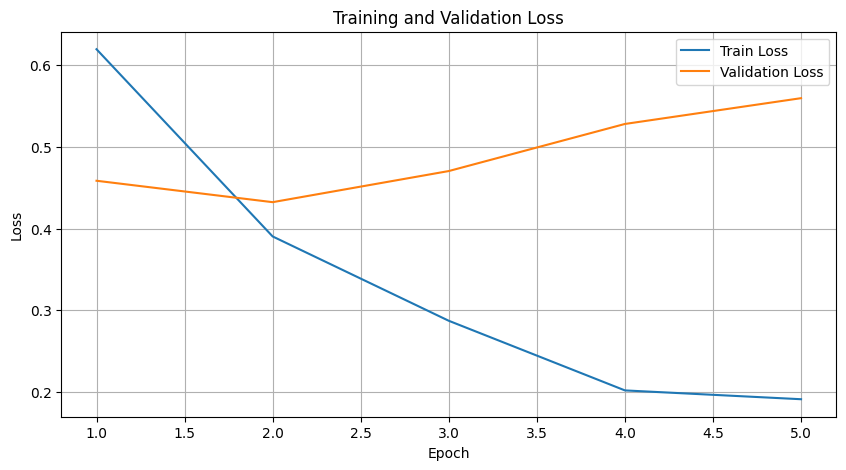

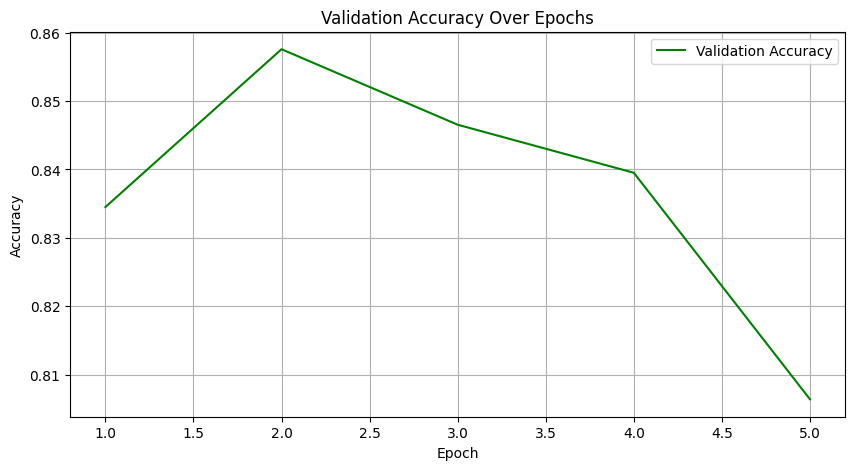

In [ ]:
epochs_ran = len(train_losses)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs_ran + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.legend()
plt.show()


Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.68      0.70       151
     neutral       0.80      0.05      0.10        79
    positive       0.88      0.98      0.93       767

    accuracy                           0.86       997
   macro avg       0.80      0.57      0.57       997
weighted avg       0.85      0.86      0.83       997



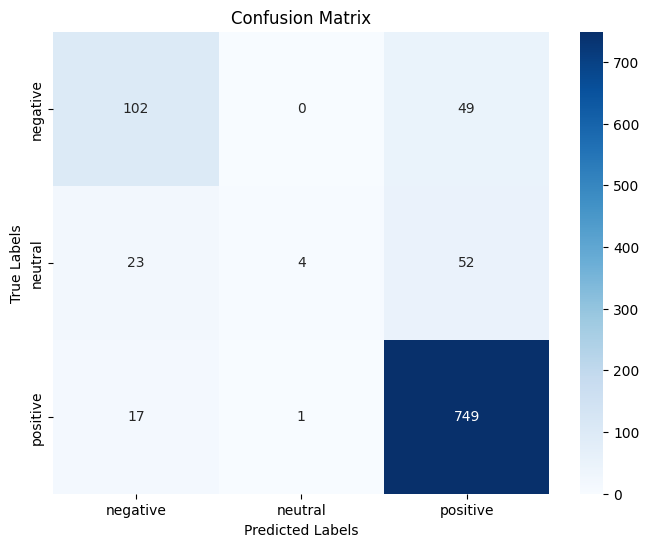

In [ ]:
# Load the best model
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

all_preds = []
all_labels = []

# Evaluation on validation set
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Print classification report
print("\nValidation Classification Report:")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## BiLSTM

In [ ]:
# Create TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_df['full_review'].values, train_df['label'].values)
)
val_dataset = tf.data.Dataset.from_tensor_slices(
    (val_df['full_review'].values, val_df['label'].values)
)

#  Shuffle, batch, prefetch
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(5000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Text Vectorization Layer
vectorize_layer = tf.keras.layers.TextVectorization(
    output_mode='int',
    output_sequence_length=128
)
vectorize_layer.adapt(train_dataset.map(lambda x, y: x))


#  Build the BiLSTM Model
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)
])

model.build(input_shape=(None,))
# Compile the Model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization_19                │ (None, 128)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_18 (Embedding)             │ (None, 128, 64)             │         905,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_36 (Bidirectional)     │ (None, 128, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_37 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,016,707 (3.88 MB)

 Trainable params: 1,016,707 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_bilstm_model.keras',
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)

class_weights_dict = dict(enumerate(class_weights))

# Train the Model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights_dict
)

Epoch 1/20
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8946 - loss: 0.3875
Epoch 1: val_loss improved from inf to 0.85754, saving model to best_bilstm_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8946 - loss: 0.3874 - val_accuracy: 0.6540 - val_loss: 0.8575
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9457 - loss: 0.1769
Epoch 2: val_loss improved from 0.85754 to 0.71321, saving model to best_bilstm_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9457 - loss: 0.1769 - val_accuracy: 0.7763 - val_loss: 0.7132
Epoch 3/20
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9776 - loss: 0.0879
Epoch 3: val_loss did not improve from 0.71321
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9776 - loss: 0.0880 - val_accuracy: 0.7623 - val_loss: 0.8184
Epoch 4/20
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9908 - loss: 0.0351
Epoch 4: val_loss did not improve from 0.71321
125/125 ━━━━━━━━━━━━━━━━

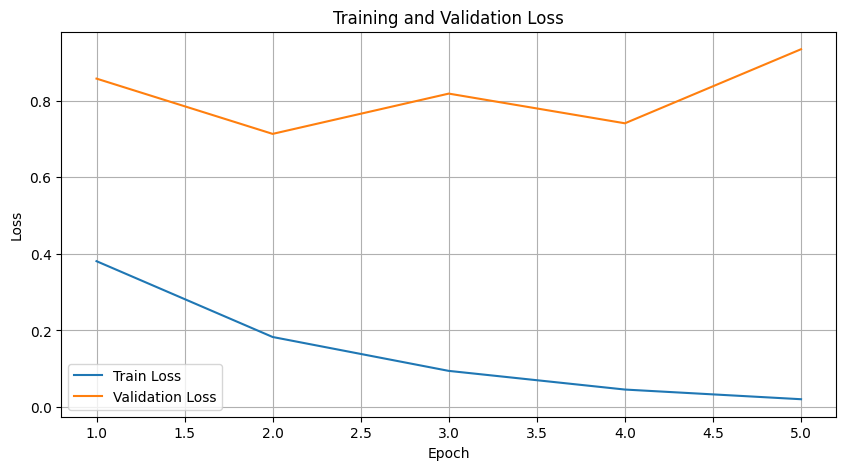

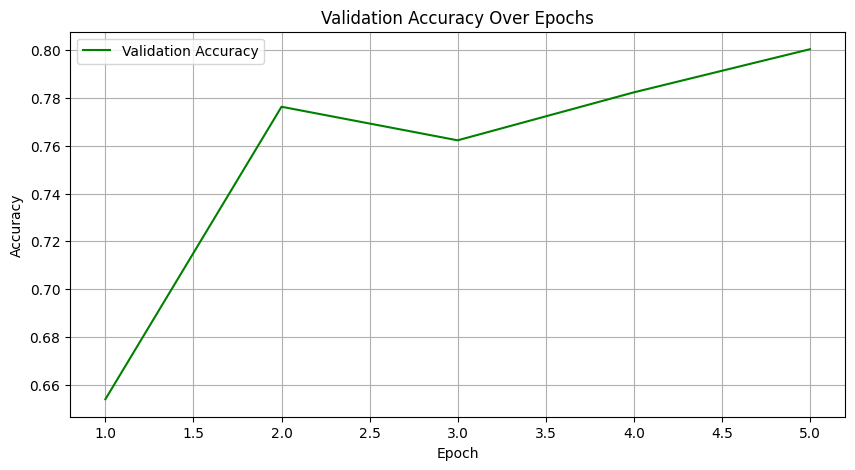

In [ ]:
# Plot losses
epochs_ran = len(history.history['loss'])
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), history.history['loss'], label='Train Loss')
plt.plot(range(1, epochs_ran + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.legend()
plt.show()


Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.64      0.66       151
     neutral       0.23      0.46      0.30        79
    positive       0.92      0.84      0.88       767

    accuracy                           0.78       997
   macro avg       0.61      0.64      0.61       997
weighted avg       0.83      0.78      0.80       997



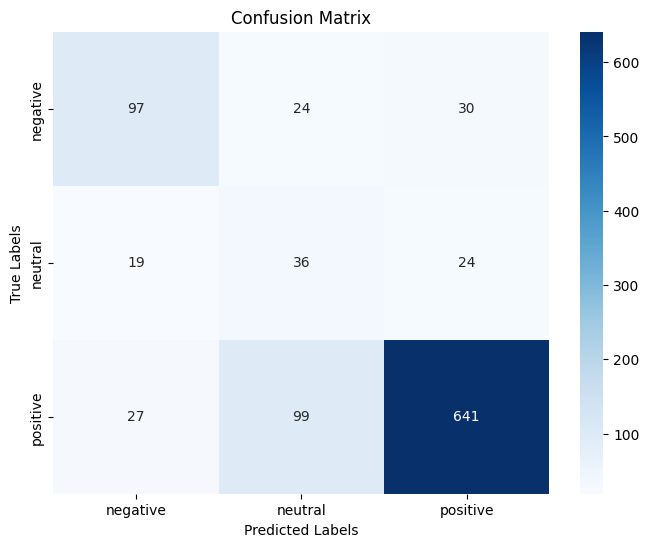

In [ ]:
# Load best model
best_model = tf.keras.models.load_model('best_bilstm_model.keras')

# Predict and evaluate
y_true = []
y_pred = []

for batch in val_dataset:
    x_batch, y_batch = batch
    logits = best_model(x_batch, training=False)
    predictions = tf.argmax(logits, axis=1)
    y_true.extend(y_batch.numpy())
    y_pred.extend(predictions.numpy())

# Classification report
print("\nValidation Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## CNN

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_df['full_review'].values, train_df['label'].values)
)
val_dataset = tf.data.Dataset.from_tensor_slices(
    (val_df['full_review'].values, val_df['label'].values)
)


BATCH_SIZE = 32

vectorize_layer = tf.keras.layers.TextVectorization(
    output_mode='int',
    output_sequence_length=128
)

vectorize_layer.adapt(train_dataset.map(lambda text, label: text))

# Build the CNN model
model = tf.keras.Sequential([
    vectorize_layer,  # Tokenizes raw text and converts to int sequences
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=128,
        mask_zero=True
    ),
    tf.keras.layers.Conv1D(128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3)  # Number of classes; no activation because using from_logits=True
])

# Build model input shape
model.build(input_shape=(None,))

# 5. Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

# Callbacks for early stopping and checkpointing
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_cnn_model.keras',
    save_best_only=True,
    monitor='val_loss',
    verbose=1
plt.xlabel('Epoch')
)

# Calculate class weights to handle imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)
class_weights_dict = dict(enumerate(class_weights))

#  Train the CNN model
history = model.fit(
    train_dataset.batch(BATCH_SIZE),
    validation_data=val_dataset.batch(BATCH_SIZE),
    epochs=20,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights_dict
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization_1                 │ (None, 128)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 128, 128)            │       1,810,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 124, 128)            │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,900,675 (7.25 MB)

 Trainable params: 1,900,675 (7.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
I0000 00:00:1750201479.685536     149 cuda_dnn.cc:529] Loaded cuDNN version 90300


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5981 - loss: 1.0716
Epoch 1: val_loss improved from inf to 0.91885, saving model to best_cnn_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5979 - loss: 1.0716 - val_accuracy: 0.6108 - val_loss: 0.9189
Epoch 2/20
117/125 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7296 - loss: 0.8626
Epoch 2: val_loss improved from 0.91885 to 0.81859, saving model to best_cnn_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7312 - loss: 0.8594 - val_accuracy: 0.6199 - val_loss: 0.8186
Epoch 3/20
116/125 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8621 - loss: 0.5218
Epoch 3: val_loss improved from 0.81859 to 0.67362, saving model to best_cnn_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8648 - loss: 0.5145 - val_accuracy: 0.7141 - val_loss: 0.6736
Epoch 4/20
122/125 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9580 - loss: 0.1763
Epoch 4: val_loss improved from 0.67362 to 0.61423, 

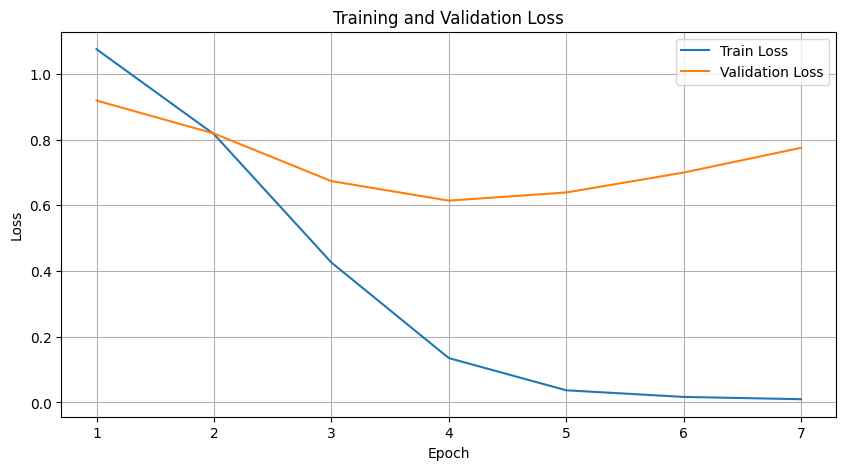

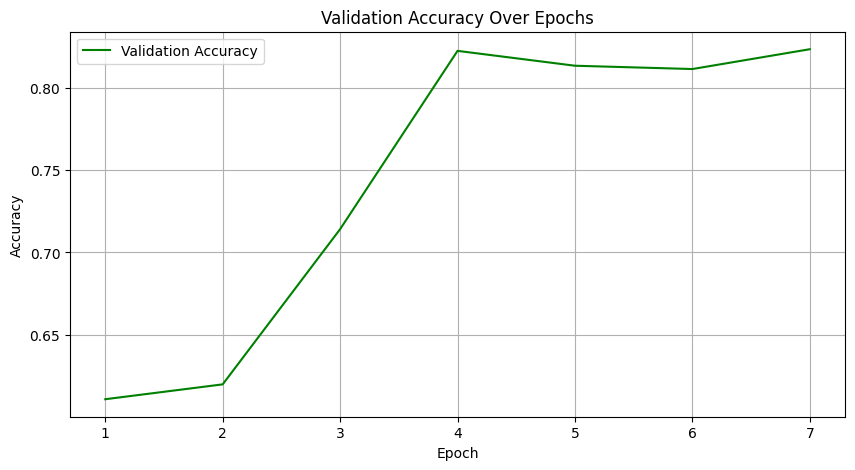

In [ ]:
# Plot losses

epochs_ran = len(history.history['loss'])
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), history.history['loss'], label='Train Loss')
plt.plot(range(1, epochs_ran + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs_ran + 1), history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.legend()
plt.show()


Validation Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.46      0.58       151
     neutral       0.34      0.35      0.35        79
    positive       0.88      0.94      0.91       767

    accuracy                           0.82       997
   macro avg       0.67      0.59      0.61       997
weighted avg       0.82      0.82      0.81       997



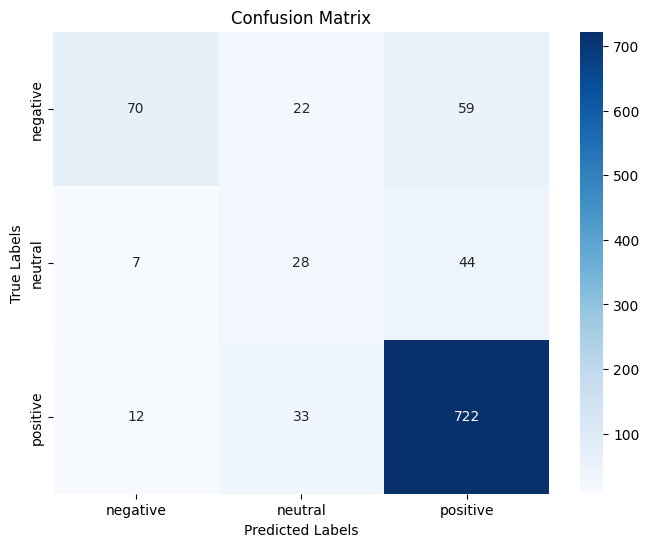

In [ ]:
# Load best model
best_model = tf.keras.models.load_model('best_cnn_model.keras')

# Batch the validation dataset (adjust batch size as needed)
val_dataset_batched = val_dataset.batch(32)

y_true = []
y_pred = []

for batch in val_dataset_batched:
    x_batch, y_batch = batch
    logits = best_model(x_batch, training=False)
    predictions = tf.argmax(logits, axis=1)
    y_true.extend(y_batch.numpy())
    y_pred.extend(predictions.numpy())

print("\nValidation Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Overall result

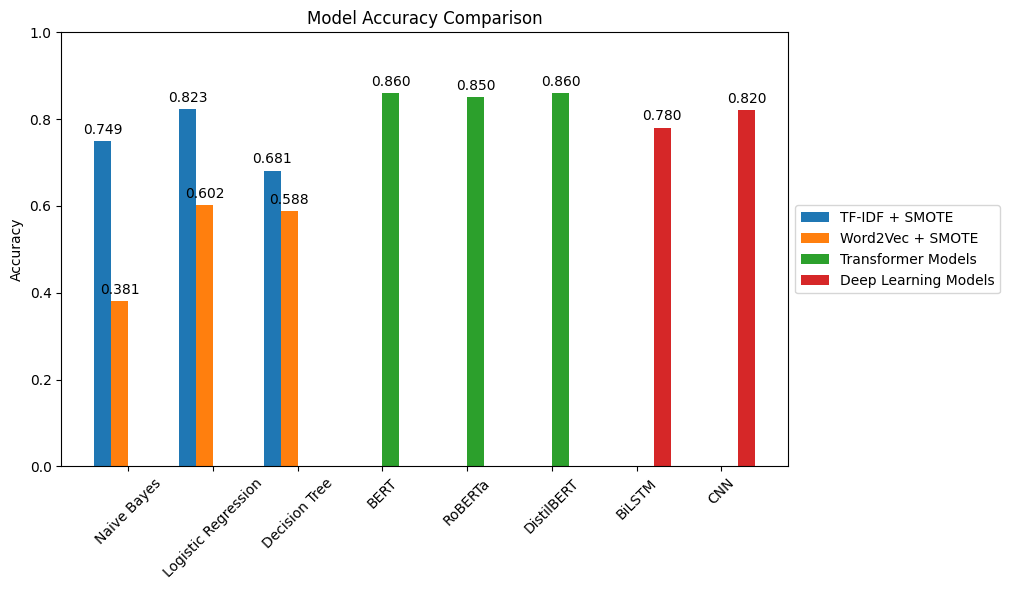

In [ ]:
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'BERT', 'RoBERTa', 'DistilBERT', 'BiLSTM', 'CNN']

# Accuracy scores aligned with models
tfidf_smote = [0.749, 0.823, 0.681, None, None, None, None, None]
w2v_smote = [0.381, 0.602, 0.588, None, None, None, None, None]
transformers = [None, None, None, 0.86, 0.85, 0.86, None, None]
deep_learning = [None, None, None, None, None, None, 0.78, 0.82]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))

# Plot bars with distinct colors for categories
bar1 = ax.bar(x - 1.5*width, [v if v is not None else 0 for v in tfidf_smote], width, label='TF-IDF + SMOTE', color='tab:blue')
bar2 = ax.bar(x - 0.5*width, [v if v is not None else 0 for v in w2v_smote], width, label='Word2Vec + SMOTE', color='tab:orange')
bar3 = ax.bar(x + 0.5*width, [v if v is not None else 0 for v in transformers], width, label='Transformer Models', color='tab:green')
bar4 = ax.bar(x + 1.5*width, [v if v is not None else 0 for v in deep_learning], width, label='Deep Learning Models', color='tab:red')

# Hide bars where values are None
for bars, vals in zip([bar1, bar2, bar3, bar4], [tfidf_smote, w2v_smote, transformers, deep_learning]):
    for bar, val in zip(bars, vals):
        if val is None:
            bar.set_height(0)
            bar.set_visible(False)

# Add values on top of bars
def add_values(bars, vals):
    for bar, val in zip(bars, vals):
        if val is not None:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{val:.3f}', ha='center', va='bottom')

for bars, vals in zip([bar1, bar2, bar3, bar4], [tfidf_smote, w2v_smote, transformers, deep_learning]):
    add_values(bars, vals)

# Create dummy bars for legend (invisible in plot, only for legend)
dummy_bars = [
    plt.Rectangle((0,0),1,1,fc='tab:blue'),
    plt.Rectangle((0,0),1,1,fc='tab:orange'),
    plt.Rectangle((0,0),1,1,fc='tab:green'),
    plt.Rectangle((0,0),1,1,fc='tab:red'),
]

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_ylim(0, 1)

# Legend outside the plot with dummy bars
ax.legend(dummy_bars, ['TF-IDF + SMOTE', 'Word2Vec + SMOTE', 'Transformer Models', 'Deep Learning Models'],
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()